In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data={'TV':[10,15,20,25,30,35,40,45,50,55],
      'Radio':[5,7,10,11,12,13,15,16,18,20],
      'Social_Media':[2,5,7,9,11,13,15,16,17,20],
      'Sales':[8.5,10.2,13.5,15.0,17.3,18.8,21.0,22.5,24.2,26.5]}
df=pd.DataFrame(data)

In [24]:
df.columns

Index(['TV', 'Radio', 'Social_Media', 'Sales'], dtype='object')

In [25]:
df.head()

,TV,Radio,Social_Media,Sales
0,10,5,2,8.5
1,15,7,5,10.2
2,20,10,7,13.5
3,25,11,9,15.0
4,30,12,11,17.3


In [26]:
df.tail()

,TV,Radio,Social_Media,Sales
5,35,13,13,18.8
6,40,15,15,21.0
7,45,16,16,22.5
8,50,18,17,24.2
9,55,20,20,26.5


In [27]:
df.describe

<bound method NDFrame.describe of    TV  Radio  Social_Media  Sales
0  10      5             2    8.5
1  15      7             5   10.2
2  20     10             7   13.5
3  25     11             9   15.0
4  30     12            11   17.3
5  35     13            13   18.8
6  40     15            15   21.0
7  45     16            16   22.5
8  50     18            17   24.2
9  55     20            20   26.5>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            10 non-null     int64  
 1   Radio         10 non-null     int64  
 2   Social_Media  10 non-null     int64  
 3   Sales         10 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 452.0 bytes


In [42]:
df.shape

(10, 4)

In [30]:
X=df[['TV','Radio','Social_Media']]
y=df['Sales']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [33]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred=model.predict(X_test_scaled)

In [35]:
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error:{mse}')
mae=mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error:{mae}')
r2=r2_score(y_test,y_pred)
print(f'R-Squared:{r2}')

Mean Squared Error:0.381731290873956
Mean Absolute Error:0.5084051724137897
R-Squared:0.9922095654923683


In [46]:
new_sales=pd.DataFrame([[3,2,1800]],columns=['feature1','feature2','feature3'])
new_sales.columns=['TV','Radio','Social_Media']
new_sales_scaled=scaler.transform(new_sales)
predicted_sales=model.predict(new_sales_scaled)
print(f'Predicted sales:{predicted_sales[0]:.3f}')

Predicted sales:798.849


Text(0, 0.5, 'Sales')

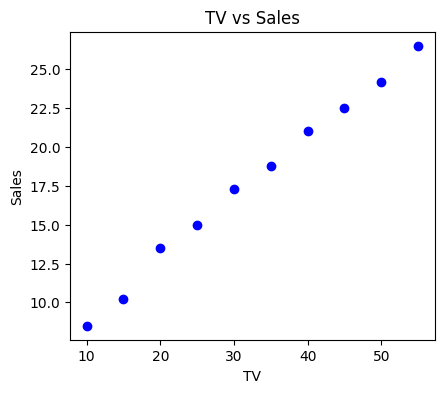

In [38]:
plt.figure(figsize=(16,4))
# TV vs Sales
plt.subplot(1,3,1)
plt.scatter(df['TV'],df['Sales'],color='blue')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

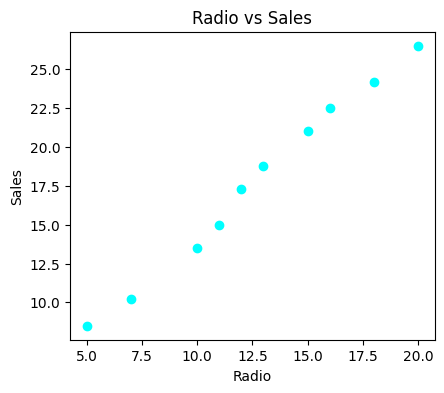

In [50]:
plt.figure(figsize=(16,4))
# Radio vs Sales
plt.subplot(1,3,2)
plt.scatter(df['Radio'],df['Sales'],color='cyan')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

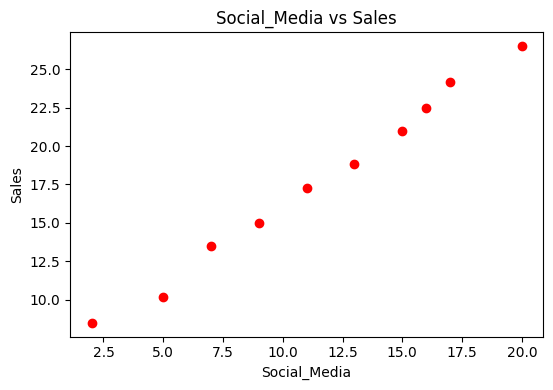

In [52]:
plt.figure(figsize=(16,4))
# Social Media vs Sales
plt.subplot(1,3,3)
plt.scatter(df['Social_Media'],df['Sales'],color='red')
plt.title('Social_Media vs Sales')
plt.xlabel('Social_Media')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()